<a href="https://colab.research.google.com/github/palaciosestefania/T-picos-en-Ecuaciones-Diferenciales/blob/main/Laplace_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transformada de Laplace con SymPy

Definición

$$\mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{d}s $$

In [1]:
import sympy #librería para matemáticas simbólicas
sympy.init_printing() #imprime caracteres 'unicode' para expresiones matemáticas.

In [3]:
import matplotlib.pyplot as plt #generación de gráficos
%matplotlib inline  #Genera gráficas dentro de la notebook

UsageError: unrecognized arguments: #Genera gráficas dentro de la notebook


In [4]:
t, s = sympy.symbols('t, s') #Declaración de la variable independiente (t) y la variable de la transformada de Laplace (s)
a = sympy.symbols('a', real=True, positive=True) #a como variable real y positiva

In [6]:
f = sympy.exp(-a*t) #declaración de una función f como e^(-at)
f #impresión de la función f

 -a⋅t
ℯ    

Podemos evaluar usando `integrate`:

In [8]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo)) #cálculo de la transformada de Laplace

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

### Libraría

In [9]:
sympy.laplace_transform(f, t, s) #cálculo de la transformafa de Laplace con la función de sympy

⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

Si solo queremos la función, usamos `noconds=True`.

In [10]:
F = sympy.laplace_transform(f, t, s, noconds=True) #No toma el cuenta el dominio de la función en el que la transformada es válida y solo se imprime el reusltado.
F

  1  
─────
a + s

Para hacerlo más rápido:

In [13]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
    #Se declara a la transfromada de Laplace como L(f) para así solo "llamarla"

In [14]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)
    #Se declara a la inversa de la transfromada de Laplace como L(f) para así solo "llamarla"

In [15]:
invL(F) #cálculo de la inversa de la Transformada de Laplace

 -a⋅t     
ℯ    ⋅θ(t)

### Función Escalón

In [16]:
sympy.Heaviside(t) #función escalón

θ(t)

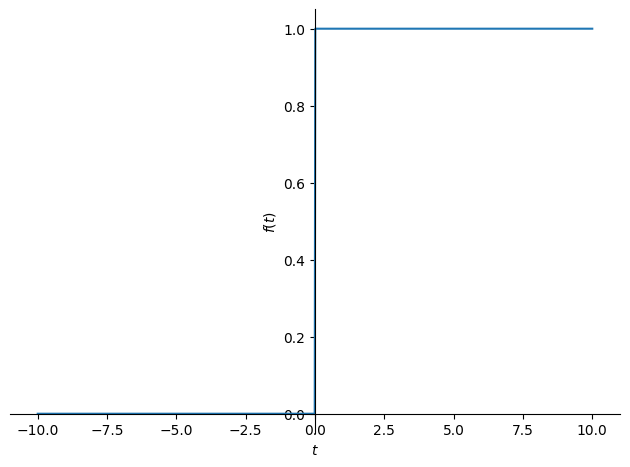

In [18]:
sympy.plot(sympy.Heaviside(t)); #Grafica de la función Heaviside

In [19]:
invL(F).subs({a: 2}) #Cálculo de la inversa de la transformada de Laplace con a=2

 -2⋅t     
ℯ    ⋅θ(t)

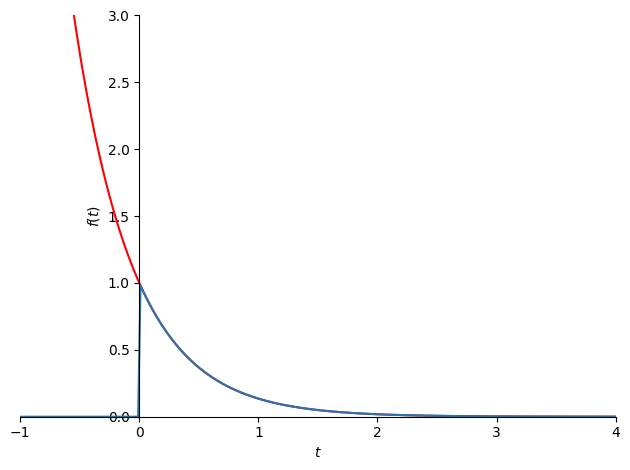

In [32]:
p = sympy.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
               xlim=(-1, 4), ylim=(0, 3), show=False)
#xlim y ylim determinan los límites de los ejes
p[0].line_color = 'red'
p.show()
#Gráfica de la función f y de la inversa de la transformada de Laplace con a=2, además f es graficada de color rojo.

### Tabla

In [34]:
omega = sympy.Symbol('omega', real=True) #Declaración de la variable omega como número real
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions #Expresión de las funciones declaradas en lista

⎡       -a⋅t     -a⋅t   2  -a⋅t                           -a⋅t   -a⋅t            -a⋅t         ⎤
⎣1, t, ℯ    , t⋅ℯ    , t ⋅ℯ    , sin(ω⋅t), cos(ω⋅t), 1 - ℯ    , ℯ    ⋅sin(ω⋅t), ℯ    ⋅cos(ω⋅t)⎦

In [36]:
Fs = [L(f) for f in functions]
Fs #Cálculo de la Transformada de Laplace de las funciones anteriores, y expresión de los resultados en lista

⎡1  1     1       1         2         ω        s         1     1        ω            a + s    ⎤
⎢─, ──, ─────, ────────, ────────, ───────, ───────, - ───── + ─, ─────────────, ─────────────⎥
⎢s   2  a + s         2         3   2    2   2    2    a + s   s   2          2   2          2⎥
⎣   s          (a + s)   (a + s)   ω  + s   ω  + s                ω  + (a + s)   ω  + (a + s) ⎦

pandas

In [37]:
from pandas import DataFrame #genera una tabla en la que sus filas y columnas tienen nombre

In [38]:
def makelatex(args):
    return ["$${}$$".format(sympy.latex(a)) for a in args] #texto excrito como si se usara latex

In [41]:
DataFrame(list(zip(makelatex(functions), makelatex(Fs))))
#makelatex (functions) toma a las funciones y las escribe como en latex
#makelatex (Functions) toma a las transformadas y las escribe como en latex
#zip toma a las dos listas de funciones y forma "parejas"

,0,1
0,$$1$$,$$\frac{1}{s}$$
1,$$t$$,$$\frac{1}{s^{2}}$$
2,$$e^{- a t}$$,$$\frac{1}{a + s}$$
3,$$t e^{- a t}$$,$$\frac{1}{\left(a + s\right)^{2}}$$
4,$$t^{2} e^{- a t}$$,$$\frac{2}{\left(a + s\right)^{3}}$$
5,$$\sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + s^{2}}$$
6,$$\cos{\left(\omega t \right)}$$,$$\frac{s}{\omega^{2} + s^{2}}$$
7,$$1 - e^{- a t}$$,$$- \frac{1}{a + s} + \frac{1}{s}$$
8,$$e^{- a t} \sin{\left(\omega t \right)}$$,$$\frac{\omega}{\omega^{2} + \left(a + s\right...
9,$$e^{- a t} \cos{\left(\omega t \right)}$$,$$\frac{a + s}{\omega^{2} + \left(a + s\right)...


### Más complicadas

In [42]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6)) #expresión de la función F

In [43]:
F

(s + 1)⋅(s + 2)⋅(s + 3)
───────────────────────
(s + 4)⋅(s + 5)⋅(s + 6)

In [46]:
F.apart(s) #Fracciones parciales

     30      24       3  
1 - ───── + ───── - ─────
    s + 6   s + 5   s + 4

In [47]:
invL(F) #Cálculo de la transformada inversa de F

          -4⋅t            -5⋅t            -6⋅t     
δ(t) - 3⋅ℯ    ⋅θ(t) + 24⋅ℯ    ⋅θ(t) - 30⋅ℯ    ⋅θ(t)